In [118]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px

In [58]:
#1. Chargement des données
df = pd.read_csv("src/Speed+Dating+Data.csv", encoding='ISO-8859-1')
#2. Aperçu des données
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [59]:
#3. Dimensions des données
print(df.shape)

(8378, 195)


In [60]:
#4. Résumé statistique
print(df.describe)

<bound method NDFrame.describe of       iid    id  gender  idg  condtn  wave  round  position  positin1  order  \
0       1   1.0       0    1       1     1     10         7       NaN      4   
1       1   1.0       0    1       1     1     10         7       NaN      3   
2       1   1.0       0    1       1     1     10         7       NaN     10   
3       1   1.0       0    1       1     1     10         7       NaN      5   
4       1   1.0       0    1       1     1     10         7       NaN      7   
...   ...   ...     ...  ...     ...   ...    ...       ...       ...    ...   
8373  552  22.0       1   44       2    21     22        14      10.0      5   
8374  552  22.0       1   44       2    21     22        13      10.0      4   
8375  552  22.0       1   44       2    21     22        19      10.0     10   
8376  552  22.0       1   44       2    21     22         3      10.0     16   
8377  552   NaN       1   44       2    21     22         2      10.0     15   

     

In [61]:
print(df.describe(include=['object']))

           field     undergra    mn_sat    tuition      from zipcode  \
count       8315         4914      3133       3583      8299    7314   
unique       259          241        68        115       269     409   
top     Business  UC Berkeley  1,400.00  26,908.00  New York       0   
freq         521          107       403        241       522     355   

           income   career  
count        4279     8289  
unique        261      367  
top     55,080.00  Finance  
freq          124      202  


In [62]:
#5. Types de données
print(df.dtypes)

iid           int64
id          float64
gender        int64
idg           int64
condtn        int64
             ...   
attr5_3     float64
sinc5_3     float64
intel5_3    float64
fun5_3      float64
amb5_3      float64
Length: 195, dtype: object


In [63]:
#6. Analyse des valeurs manquantes
missing_values = df.isnull().sum()
print(missing_values)

iid            0
id             1
gender         0
idg            0
condtn         0
            ... 
attr5_3     6362
sinc5_3     6362
intel5_3    6362
fun5_3      6362
amb5_3      6362
Length: 195, dtype: int64


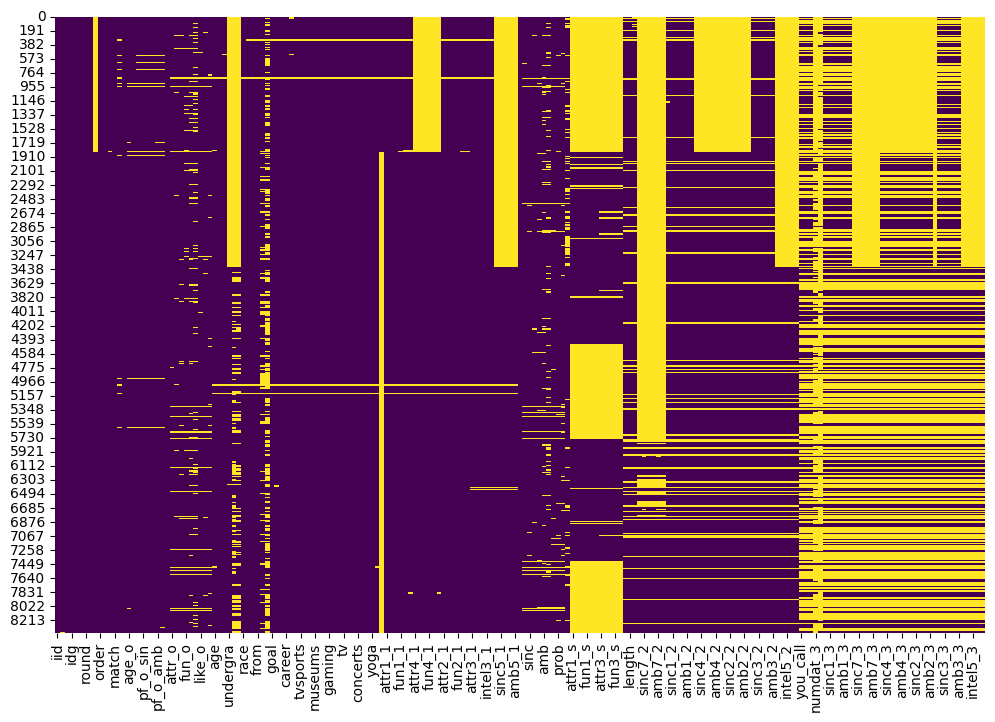

In [64]:
# Visualisation des valeurs manquantes
plt.figure(figsize=(12, 8))
sns.heatmap(df.isnull(), cbar=False, cmap='viridis')
plt.show()

In [65]:
# le income est basé sur le zip donc pas réelle et a trop de missing values
# Suppression de la colonne 'income'
df = df.drop('income', axis=1)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,positin1,order,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,NaN,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,NaN,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,NaN,10,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,NaN,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,NaN,7,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


In [66]:
# Suppression de la colonne 'positin1', la place où les gens sont assis ne présentent que peu d'importance
# Suppression de la colonne 'positin1'
df = df.drop('positin1', axis=1)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,4,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,3,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,10,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,5,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,7,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


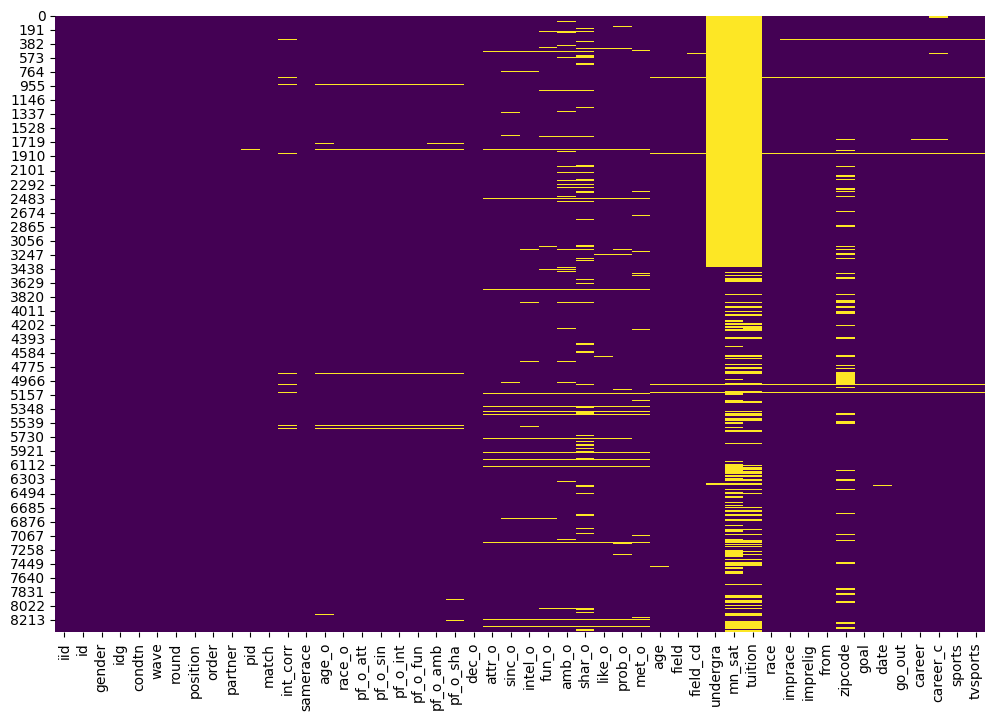

In [67]:
# Sélectionner les colonnes les 50 premières colonnes
df_subset1 = df.iloc[:, :50]

# Visualisation des valeurs manquantes pour ces colonnes
plt.figure(figsize=(12, 8))
sns.heatmap(df_subset1.isnull(), cbar=False, cmap='viridis')
plt.show()

In [68]:
# suppression de undergra, mn_sat et tuition
df = df.drop(['undergra', 'mn_sat', 'tuition'], axis=1)
df.head

<bound method NDFrame.head of       iid    id  gender  idg  condtn  wave  round  position  order  partner  \
0       1   1.0       0    1       1     1     10         7      4        1   
1       1   1.0       0    1       1     1     10         7      3        2   
2       1   1.0       0    1       1     1     10         7     10        3   
3       1   1.0       0    1       1     1     10         7      5        4   
4       1   1.0       0    1       1     1     10         7      7        5   
...   ...   ...     ...  ...     ...   ...    ...       ...    ...      ...   
8373  552  22.0       1   44       2    21     22        14      5       18   
8374  552  22.0       1   44       2    21     22        13      4       19   
8375  552  22.0       1   44       2    21     22        19     10       20   
8376  552  22.0       1   44       2    21     22         3     16       21   
8377  552   NaN       1   44       2    21     22         2     15       22   

      ...  attr3_3  s

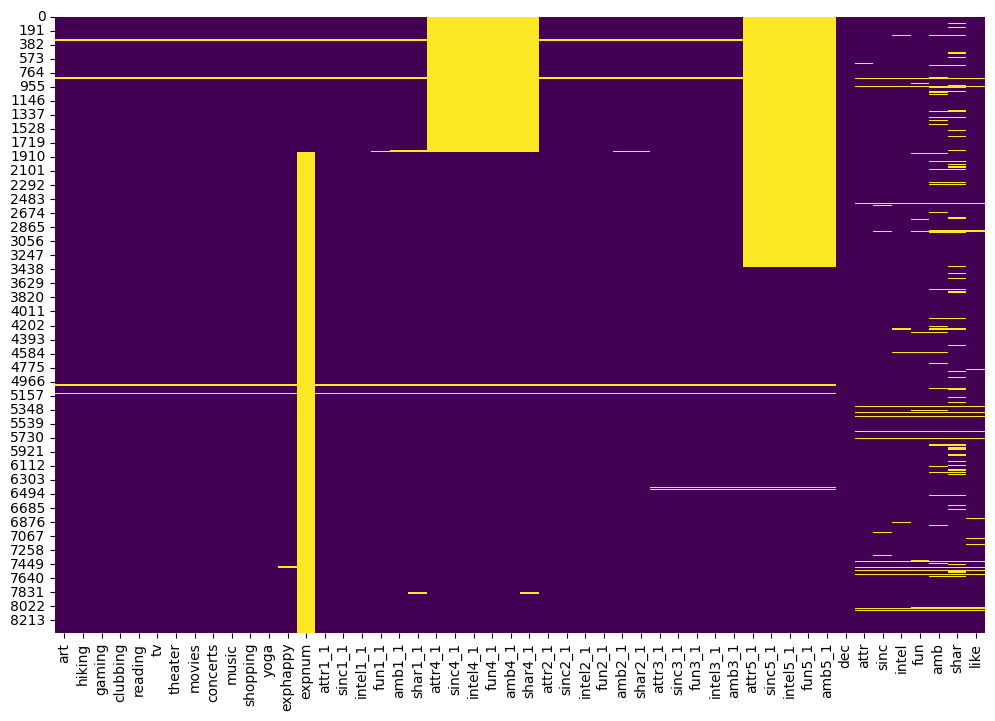

In [69]:
# Sélectionner les colonnes de 50 à 100 (cela inclut les colonnes avec l'indice 50 à 99)
df2_subset = df.iloc[:, 50:100]

# Visualisation des valeurs manquantes pour ces colonnes
plt.figure(figsize=(12, 8))
sns.heatmap(df2_subset.isnull(), cbar=False, cmap='viridis')
plt.show()

In [73]:
# Suppression de la colonne 'expnum'
df = df.drop('expnum', axis=1)
df.head()

,iid,id,gender,idg,condtn,wave,round,position,order,partner,...,attr3_3,sinc3_3,intel3_3,fun3_3,amb3_3,attr5_3,sinc5_3,intel5_3,fun5_3,amb5_3
0,1,1.0,0,1,1,1,10,7,4,1,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
1,1,1.0,0,1,1,1,10,7,3,2,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
2,1,1.0,0,1,1,1,10,7,10,3,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
3,1,1.0,0,1,1,1,10,7,5,4,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN
4,1,1.0,0,1,1,1,10,7,7,5,...,5.0,7.0,7.0,7.0,7.0,NaN,NaN,NaN,NaN,NaN


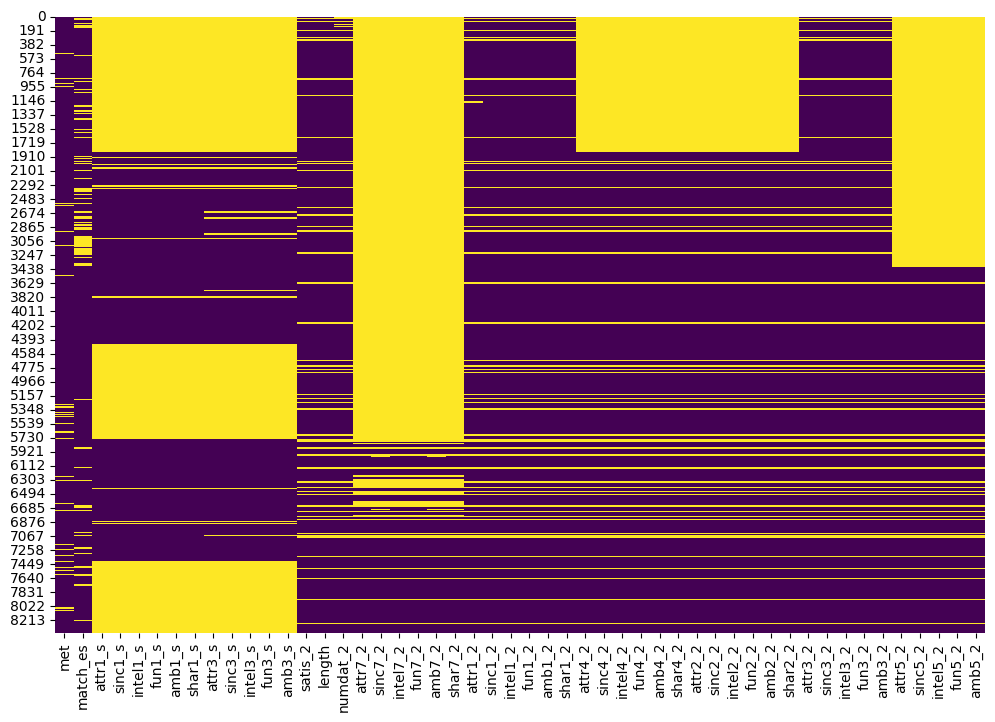

In [75]:
# après suppression de expnum
df3_subset = df.iloc[:, 100:150]
# Visualisation des valeurs manquantes pour ces colonnes
plt.figure(figsize=(12, 8))
sns.heatmap(df3_subset.isnull(), cbar=False, cmap='viridis')
plt.show()
# importance of these attributes in your decisions = très peu de réponse 7_2

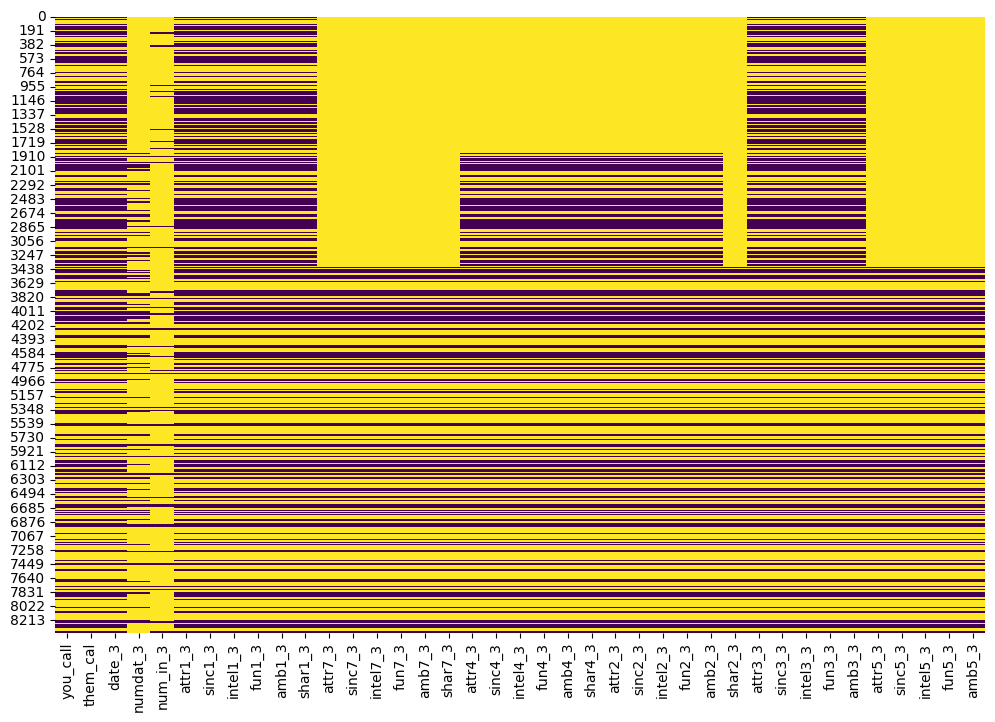

In [76]:
df_subset4 = df.iloc[:, 150:]
# Visualisation des valeurs manquantes pour ces colonnes
plt.figure(figsize=(12, 8))
sns.heatmap(df_subset4.isnull(), cbar=False, cmap='viridis')
plt.show()
# toute la partie follow up2/time3 a été très peu renseignée

In [77]:
print(df.describe(include=['object']))
# field trop de résultats et de doublon, on utilise field_cd
# from c'est pareil, impossible de matcher la totalité
# carerr trop de résultats et de doublon, on utilise career_c


           field      from zipcode   career
count       8315      8299    7314     8289
unique       259       269     409      367
top     Business  New York       0  Finance
freq         521       522     355      202


In [81]:
# Analyse demo
# Afficher la répartition des genres
print(df['gender'].value_counts())

gender
1    4194
0    4184
Name: count, dtype: int64


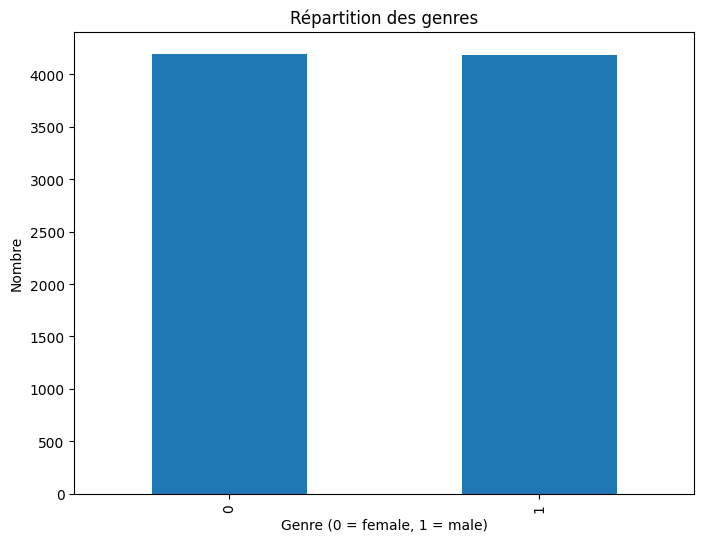

In [83]:
# Tracer un graphique à barres pour la répartition des genres
ax = df['gender'].value_counts().plot(kind='bar', figsize=(8, 6), title='Répartition des genres')

# Renommer les étiquettes de l'axe X : 'female' devient 0 et 'male' devient 1
ax.set_xticklabels(['0', '1'])

plt.xlabel('Genre (0 = female, 1 = male)')
plt.ylabel('Nombre')
plt.show()

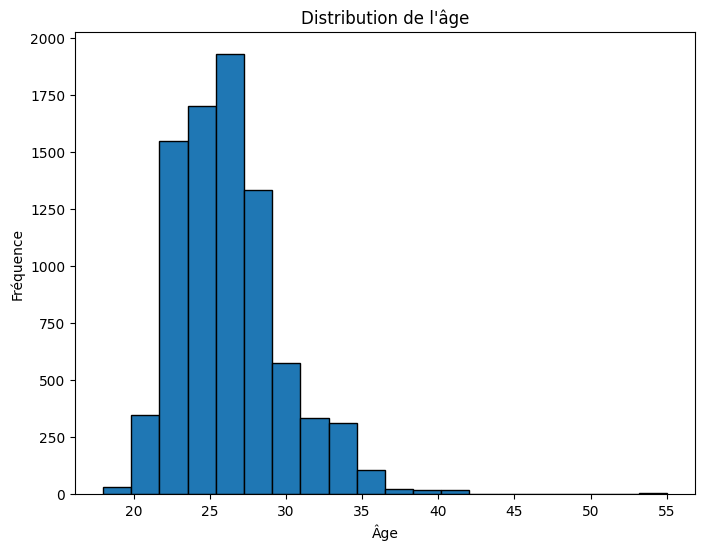

In [84]:
# Tracer un histogramme pour la colonne 'age'
plt.figure(figsize=(8, 6))
plt.hist(df['age'], bins=20, edgecolor='black')
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

In [120]:
fig = px.histogram(df, x = "age")
fig.show()

In [122]:
age_distribution_gender = df.groupby(['age','gender']).size().reset_index(name='Count')
age_distribution_gender.head()

,age,gender,Count
0,18.0,1,10
1,19.0,0,10
2,19.0,1,10
3,20.0,0,30
4,20.0,1,25


In [127]:
# Dictionnaire pour mapper les valeurs numériques à leurs interprétations textuelles
gender_mapping = {
    0: 'female',
    1: 'male',
}

# Remplacer les valeurs numériques dans la colonne 'gender' par les labels textuels
df['gender'] = df['gender'].replace(gender_mapping)

# Créer une distribution d'âge par genre (par exemple, si tu veux grouper par 'gender' et 'age')
age_distribution_gender = df.groupby('gender')['age'].describe()

# Afficher le résultat
age_distribution_gender.head()

,count,mean,std,min,25%,50%,75%,max
gender,,,,,,,,
female,4184.0,26.104207,3.654404,19.0,23.0,26.0,28.0,55.0
male,4194.0,26.604912,3.418024,18.0,24.0,27.0,29.0,42.0


In [129]:
# Créer une table de fréquence de la distribution d'âge par genre
age_distribution_gender = df.groupby(['gender', 'age']).size().reset_index(name='Count')
# Tracer la courbe de distribution d'âge par genre
fig = px.line(age_distribution_gender, x='age', y='Count', color='gender', markers=True, 
              title="Distribution of Age by Gender")
fig.show()

In [85]:
# Valeur la plus petite (âge minimum)
age_min = df['age'].min()

# Valeur la plus grande (âge maximum)
age_max = df['age'].max()

# Afficher les résultats
print(f"L'âge minimum est : {age_min}")
print(f"L'âge maximum est : {age_max}")

L'âge minimum est : 18.0
L'âge maximum est : 55.0


In [86]:
# Définir les bornes des tranches d'âge
bins = [18, 24, 34, 44, 54, 64]

# Définir les labels correspondants
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

# Créer une nouvelle colonne 'age_group' basée sur les tranches d'âge
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Afficher les premières lignes pour vérifier
print(df[['age', 'age_group']].head())

    age age_group
0  21.0     18-24
1  21.0     18-24
2  21.0     18-24
3  21.0     18-24
4  21.0     18-24


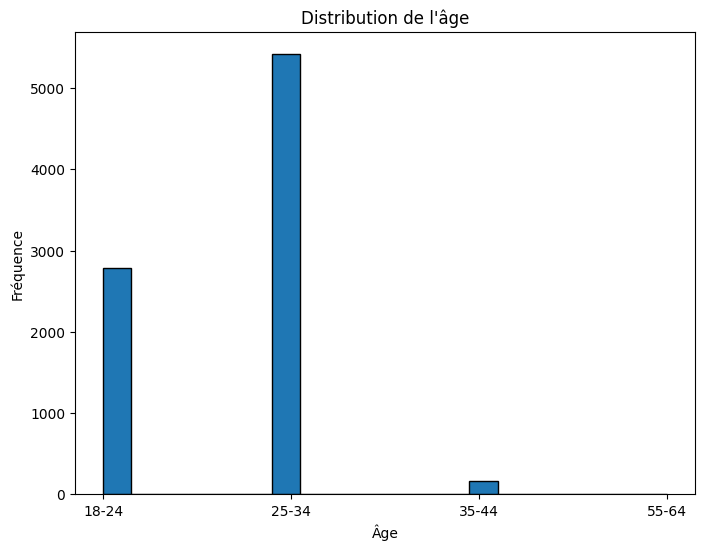

In [119]:
# Tracer un histogramme pour la colonne 'age_group'
plt.figure(figsize=(8, 6))
plt.hist(df['age_group'], bins=20, edgecolor='black')
plt.title('Distribution de l\'âge')
plt.xlabel('Âge')
plt.ylabel('Fréquence')
plt.show()

In [88]:
# Compter les valeurs manquantes dans la colonne 'age'
missing_age_count = df['age'].isna().sum()

# Afficher le résultat
print(f"Il y a {missing_age_count} valeurs manquantes dans la colonne 'age'.")

Il y a 95 valeurs manquantes dans la colonne 'age'.


In [89]:
#remplacement des valeurs manquantes par la médiane
# Calculer la médiane de la colonne 'age'
age_median = df['age'].median()

# Afficher la médiane
print(f"La médiane de l'âge est : {age_median}")

La médiane de l'âge est : 26.0


In [91]:
# Remplacer les valeurs manquantes dans 'age' par la médiane, sans utiliser inplace
df['age'] = df['age'].fillna(age_median)

In [92]:
# Vérifier qu'il n'y a plus de valeurs manquantes
print(df['age'].isna().sum())

0


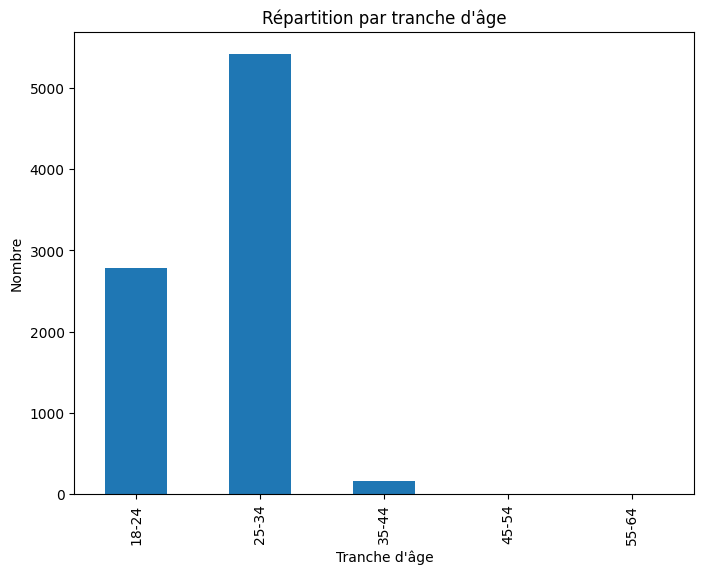

In [93]:
# Créer les tranches d'âge après avoir remplacé les valeurs manquantes
bins = [18, 24, 34, 44, 54, 64]
labels = ['18-24', '25-34', '35-44', '45-54', '55-64']

# Recréer la colonne 'age_group'
df['age_group'] = pd.cut(df['age'], bins=bins, labels=labels, right=True, include_lowest=True)

# Tracer la répartition des tranches d'âge
df['age_group'].value_counts().sort_index().plot(kind='bar', figsize=(8, 6), title='Répartition par tranche d\'âge')
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre')
plt.show()

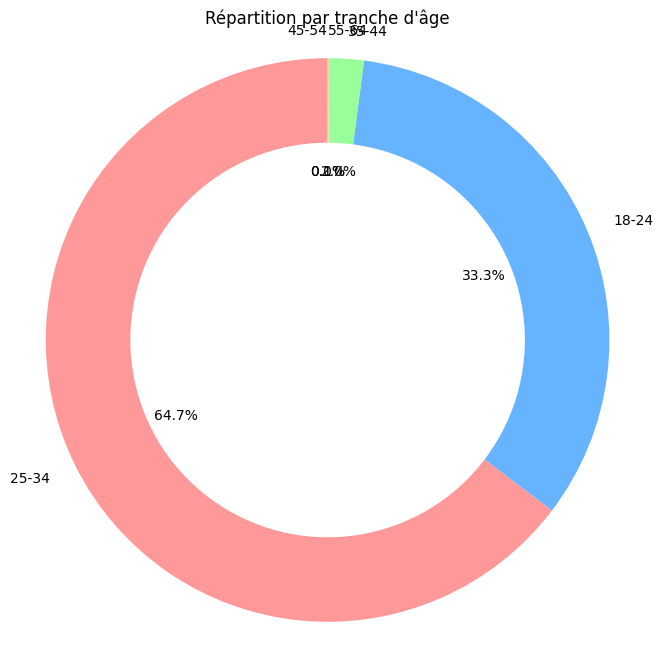

In [94]:
# Compter les occurrences dans chaque tranche d'âge
age_group_counts = df['age_group'].value_counts()

# Créer le graphique en camembert avec les pourcentages
plt.figure(figsize=(8, 8))
plt.pie(age_group_counts, labels=age_group_counts.index, autopct='%1.1f%%', startangle=90, colors=['#ff9999','#66b3ff','#99ff99','#ffcc99', '#c2c2f0'])

# Ajouter un cercle pour rendre le camembert "en anneau"
centre_circle = plt.Circle((0, 0), 0.70, fc='white')
plt.gca().add_artist(centre_circle)

# Assurer que le graphique est bien circulaire
plt.axis('equal')

# Ajouter un titre
plt.title('Répartition par tranche d\'âge')

# Afficher le graphique
plt.show()

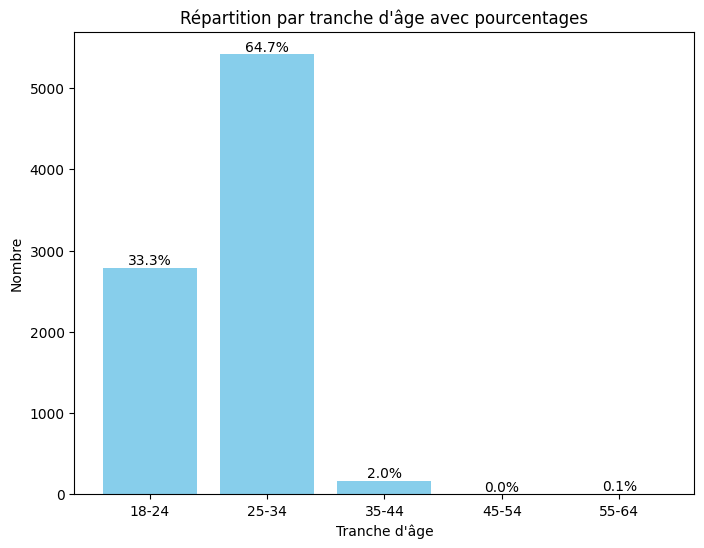

In [95]:
# Calculer le nombre d'occurrences dans chaque tranche d'âge
age_group_counts = df['age_group'].value_counts().sort_index()

# Calculer les pourcentages
total = age_group_counts.sum()
age_group_percentages = (age_group_counts / total) * 100

# Créer le graphique à barres
plt.figure(figsize=(8, 6))
bars = plt.bar(age_group_counts.index, age_group_counts, color='skyblue')

# Ajouter les pourcentages sur les barres
for bar, percentage in zip(bars, age_group_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom')

# Ajouter des labels et un titre
plt.xlabel('Tranche d\'âge')
plt.ylabel('Nombre')
plt.title('Répartition par tranche d\'âge avec pourcentages')

# Afficher le graphique
plt.show()

In [96]:
# répartition race
# Remplacer les valeurs manquantes dans la colonne 'race' par 'N/A'
df['race'] = df['race'].fillna('N/A')

In [97]:
# Dictionnaire pour mapper les valeurs numériques à leurs interprétations textuelles
race_mapping = {
    1: 'Black/African American',
    2: 'European/Caucasian-American',
    3: 'Latino/Hispanic American',
    4: 'Asian/Pacific Islander/Asian-American',
    5: 'Native American',
    6: 'Other'
}

# Remplacer les valeurs numériques dans la colonne 'race' par les labels textuels
df['race'] = df['race'].replace(race_mapping)

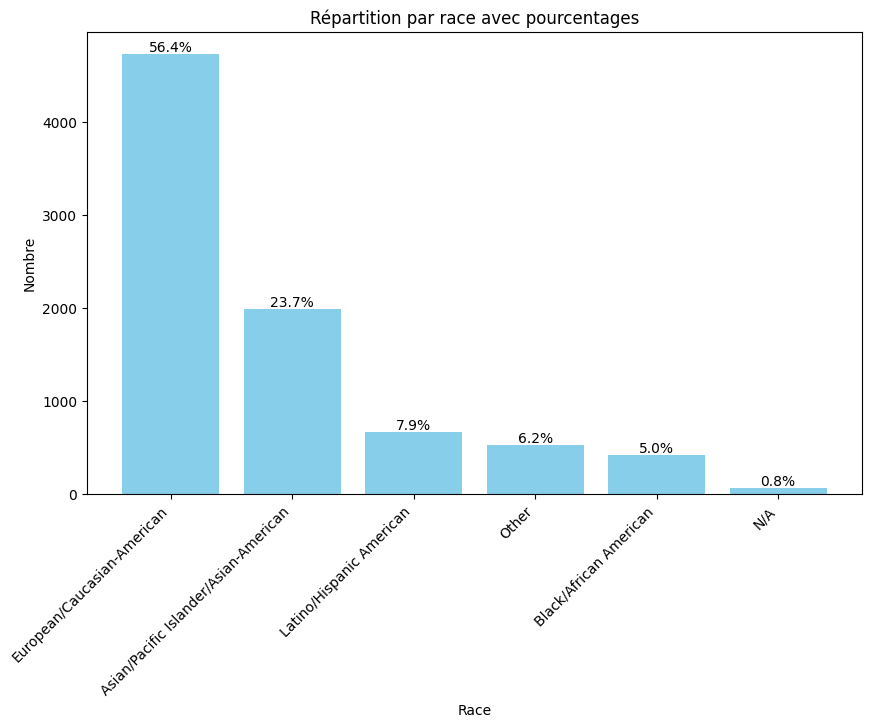

In [98]:
# Compter les occurrences dans chaque catégorie de race
race_counts = df['race'].value_counts()

# Calculer les pourcentages
total_race = race_counts.sum()
race_percentages = (race_counts / total_race) * 100

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
bars = plt.bar(race_counts.index, race_counts, color='skyblue')

# Ajouter les pourcentages sur les barres
for bar, percentage in zip(bars, race_percentages):
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), f'{percentage:.1f}%', 
             ha='center', va='bottom')

# Ajouter des labels et un titre
plt.xlabel('Race')
plt.ylabel('Nombre')
plt.title('Répartition par race avec pourcentages')

# Rotation des labels pour meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()

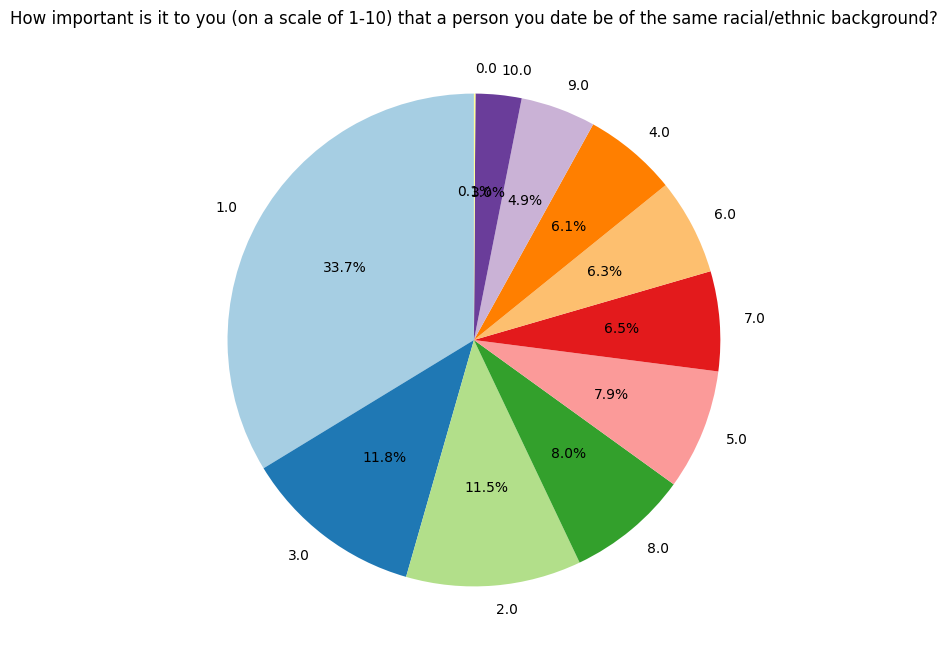

In [99]:
# Compter les occurrences des valeurs dans la colonne 'imprace'
imprace_counts = df['imprace'].value_counts()

# Créer le camembert avec les pourcentages
plt.figure(figsize=(8, 8))
plt.pie(imprace_counts, labels=imprace_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Ajouter un titre
plt.title('How important is it to you (on a scale of 1-10) that a person you date be of the same racial/ethnic background?')

# Afficher le graphique
plt.show()

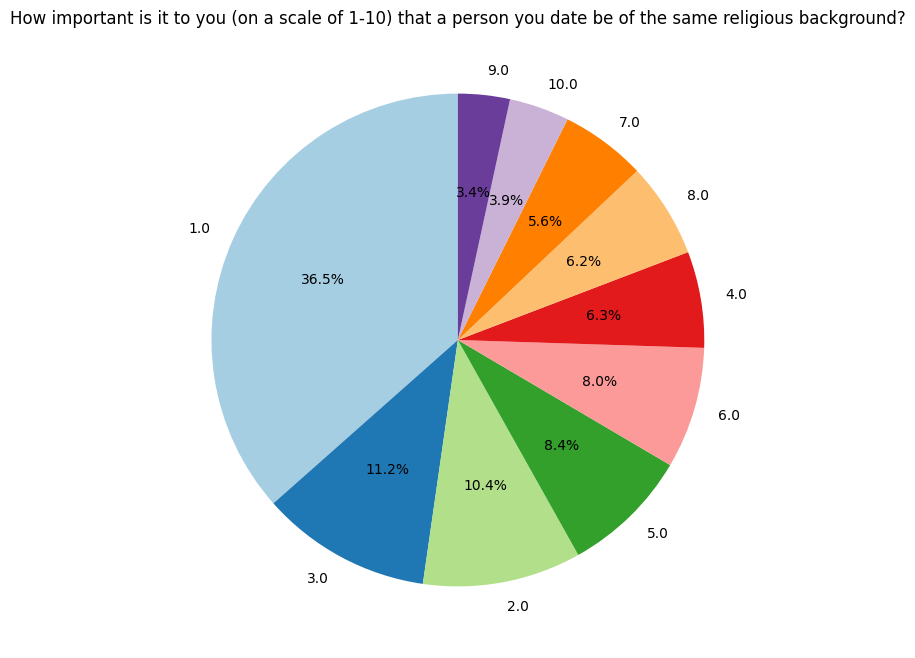

In [100]:
# Compter les occurrences des valeurs dans la colonne 'imprace'
imprelig_counts = df['imprelig'].value_counts()

# Créer le camembert avec les pourcentages
plt.figure(figsize=(8, 8))
plt.pie(imprelig_counts, labels=imprelig_counts.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)

# Ajouter un titre
plt.title('How important is it to you (on a scale of 1-10) that a person you date be of the same religious background?')

# Afficher le graphique
plt.show()

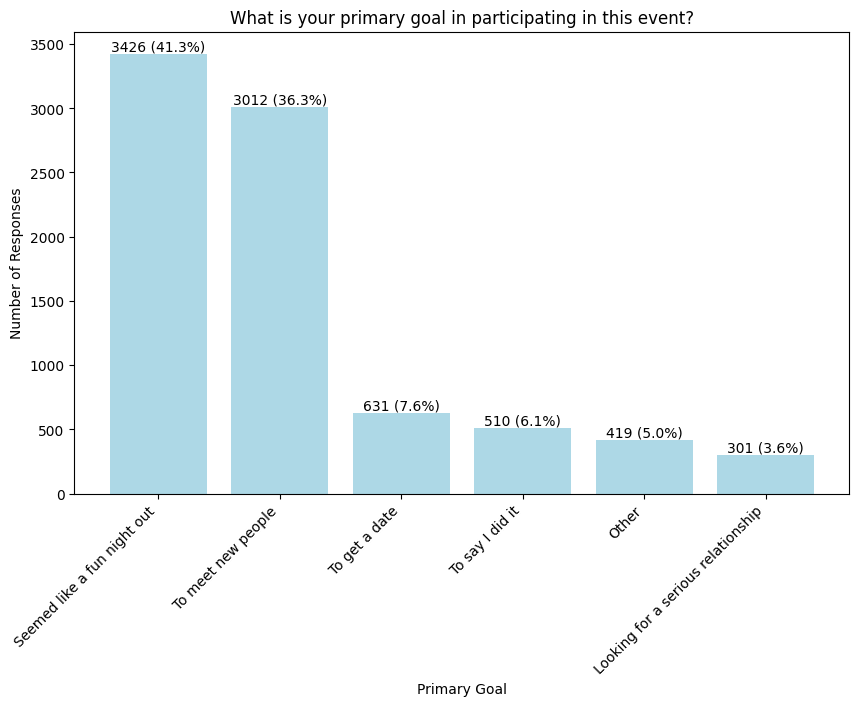

In [102]:
# Dictionnaire pour mapper les valeurs numériques aux labels textuels
goal_mapping = {
    1: 'Seemed like a fun night out',
    2: 'To meet new people',
    3: 'To get a date',
    4: 'Looking for a serious relationship',
    5: 'To say I did it',
    6: 'Other'
}

# Compter les occurrences dans la colonne 'goal'
goal_counts = df['goal'].value_counts()

# Calculer le total pour obtenir les pourcentages
total = goal_counts.sum()
goal_percentages = (goal_counts / total) * 100

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
bars = plt.bar([goal_mapping[val] for val in goal_counts.index], goal_counts, color='lightblue')

# Ajouter les valeurs et les pourcentages au-dessus des barres
for bar, count, percentage in zip(bars, goal_counts, goal_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(count)} ({percentage:.1f}%)', 
             ha='center', va='bottom')

# Ajouter des labels et un titre
plt.xlabel('Primary Goal')
plt.ylabel('Number of Responses')
plt.title('What is your primary goal in participating in this event?')

# Rotation des labels pour meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()

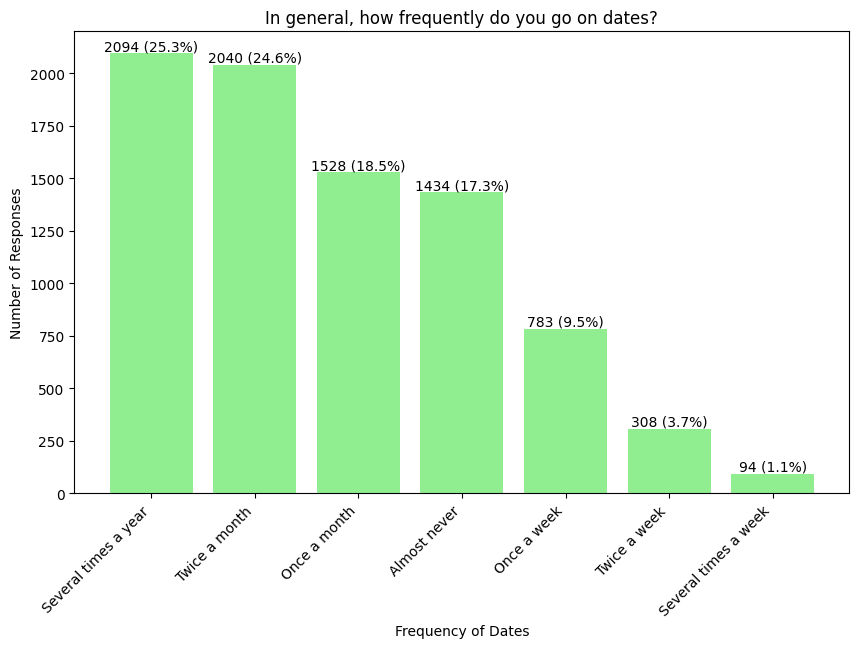

In [107]:
# Dictionnaire pour mapper les valeurs numériques aux labels textuels
date_mapping = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'
}

# Compter les occurrences dans la colonne 'date'
date_counts = df['date'].value_counts()

# Calculer le total pour obtenir les pourcentages
total_date = date_counts.sum()
date_percentages = (date_counts / total_date) * 100

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
bars = plt.bar([date_mapping[val] for val in date_counts.index], date_counts, color='lightgreen')

# Ajouter les valeurs et les pourcentages au-dessus des barres
for bar, count, percentage in zip(bars, date_counts, date_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(count)} ({percentage:.1f}%)', 
             ha='center', va='bottom')

# Ajouter des labels et un titre
plt.xlabel('Frequency of Dates')
plt.ylabel('Number of Responses')
plt.title('In general, how frequently do you go on dates?')

# Rotation des labels pour meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()

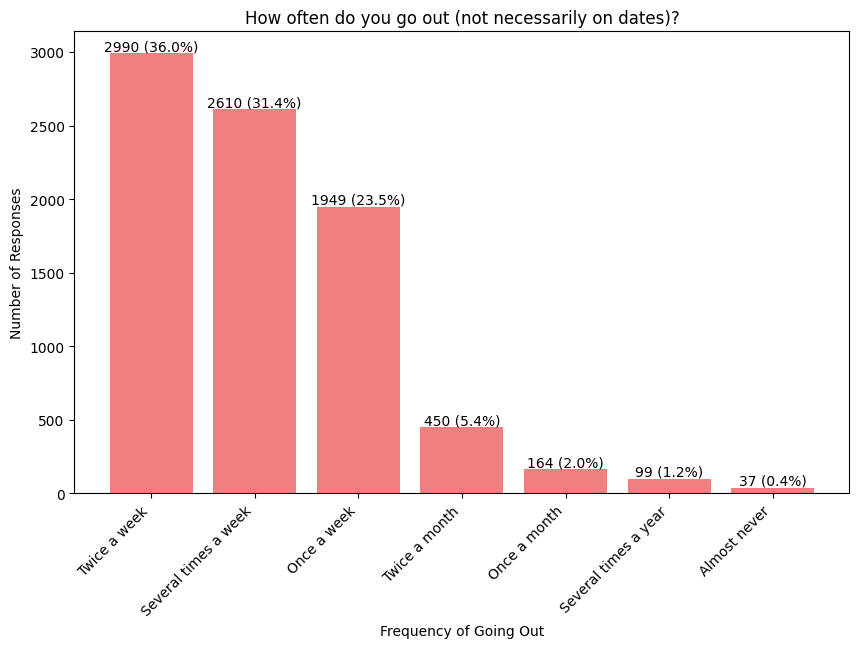

In [108]:
# Dictionnaire pour mapper les valeurs numériques aux labels textuels
go_out_mapping = {
    1: 'Several times a week',
    2: 'Twice a week',
    3: 'Once a week',
    4: 'Twice a month',
    5: 'Once a month',
    6: 'Several times a year',
    7: 'Almost never'
}

# Compter les occurrences dans la colonne 'go_out'
go_out_counts = df['go_out'].value_counts()

# Calculer le total pour obtenir les pourcentages
total_go_out = go_out_counts.sum()
go_out_percentages = (go_out_counts / total_go_out) * 100

# Créer le graphique à barres
plt.figure(figsize=(10, 6))
bars = plt.bar([go_out_mapping[val] for val in go_out_counts.index], go_out_counts, color='lightcoral')

# Ajouter les valeurs et les pourcentages au-dessus des barres
for bar, count, percentage in zip(bars, go_out_counts, go_out_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(count)} ({percentage:.1f}%)', 
             ha='center', va='bottom')

# Ajouter des labels et un titre
plt.xlabel('Frequency of Going Out')
plt.ylabel('Number of Responses')
plt.title('How often do you go out (not necessarily on dates)?')

# Rotation des labels pour meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()

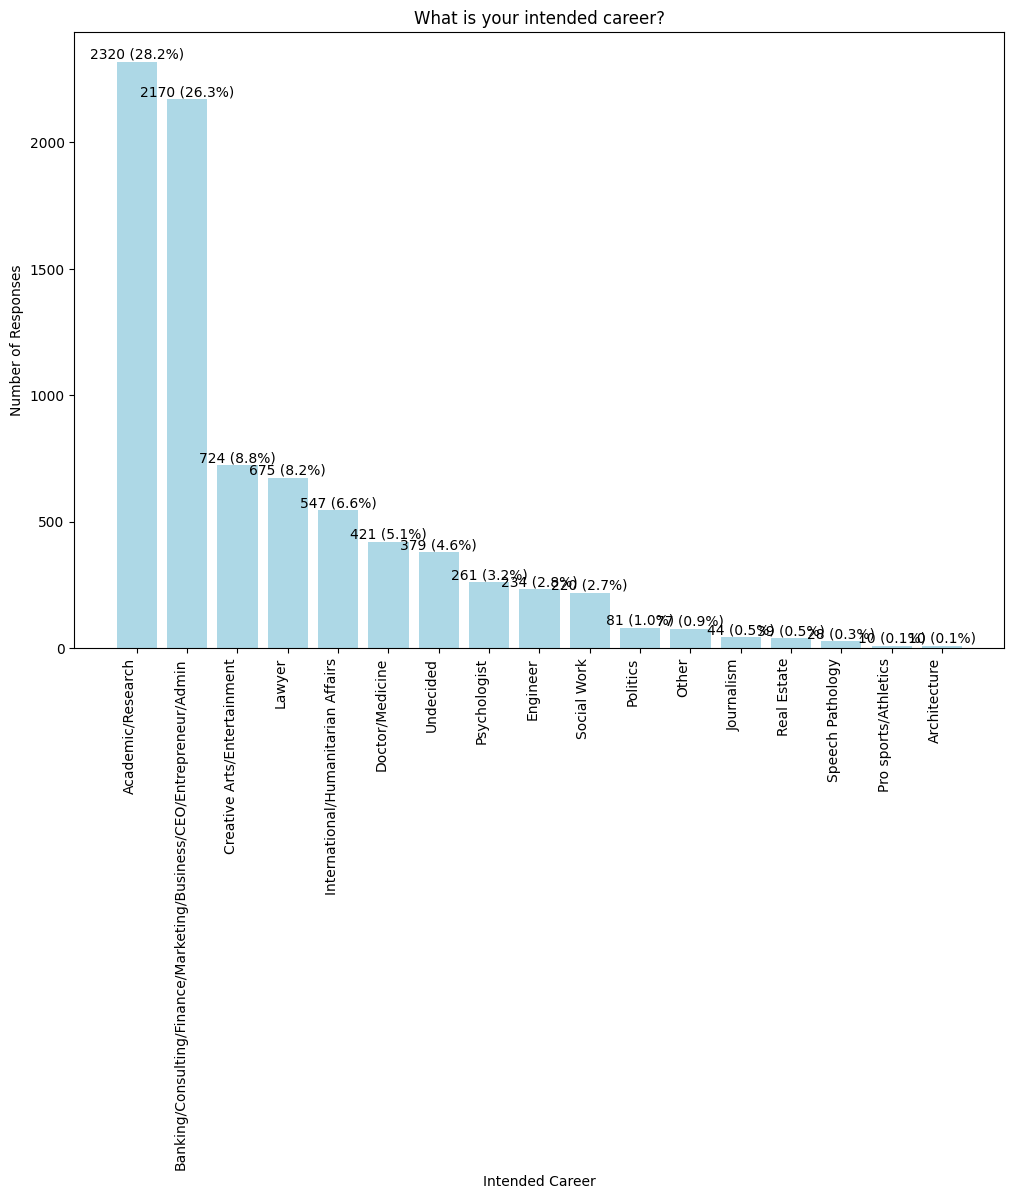

In [110]:
# Dictionnaire pour mapper les valeurs numériques aux labels textuels
career_mapping = {
    1: 'Lawyer',
    2: 'Academic/Research',
    3: 'Psychologist',
    4: 'Doctor/Medicine',
    5: 'Engineer',
    6: 'Creative Arts/Entertainment',
    7: 'Banking/Consulting/Finance/Marketing/Business/CEO/Entrepreneur/Admin',
    8: 'Real Estate',
    9: 'International/Humanitarian Affairs',
    10: 'Undecided',
    11: 'Social Work',
    12: 'Speech Pathology',
    13: 'Politics',
    14: 'Pro sports/Athletics',
    15: 'Other',
    16: 'Journalism',
    17: 'Architecture'
}

# Compter les occurrences dans la colonne 'career'
career_counts = df['career_c'].value_counts()

# Calculer le total pour obtenir les pourcentages
total_career = career_counts.sum()
career_percentages = (career_counts / total_career) * 100

# Créer le graphique à barres
plt.figure(figsize=(12, 8))
bars = plt.bar([career_mapping[val] for val in career_counts.index], career_counts, color='lightblue')

# Ajouter les valeurs et les pourcentages au-dessus des barres
for bar, count, percentage in zip(bars, career_counts, career_percentages):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height(), f'{int(count)} ({percentage:.1f}%)', 
             ha='center', va='bottom')

# Ajouter des labels et un titre
plt.xlabel('Intended Career')
plt.ylabel('Number of Responses')
plt.title('What is your intended career?')

# Rotation des labels pour meilleure lisibilité
plt.xticks(rotation=90, ha='right')

# Afficher le graphique
plt.show()

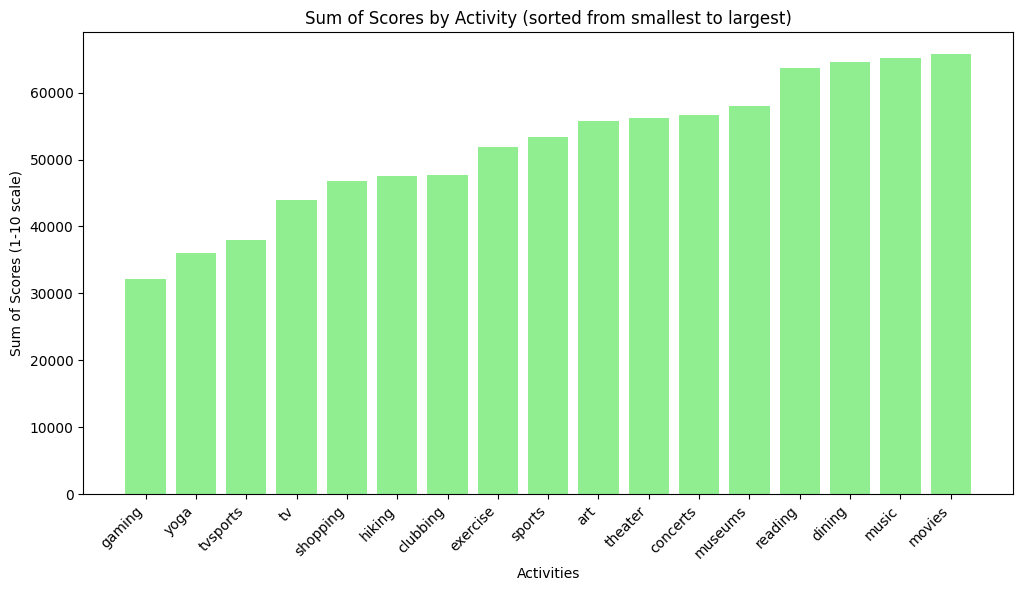

In [112]:
# Sélectionner les colonnes pertinentes
columns_of_interest = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Calculer la somme par colonne et trier les résultats du plus petit au plus grand
column_sums = df[columns_of_interest].sum().sort_values()

# Créer le graphique à barres
plt.figure(figsize=(12, 6))
bars = plt.bar(column_sums.index, column_sums.values, color='lightgreen')

# Ajouter des labels
plt.xlabel('Activities')
plt.ylabel('Sum of Scores (1-10 scale)')
plt.title('Sum of Scores by Activity (sorted from smallest to largest)')

# Rotation des labels pour meilleure lisibilité
plt.xticks(rotation=45, ha='right')

# Afficher le graphique
plt.show()

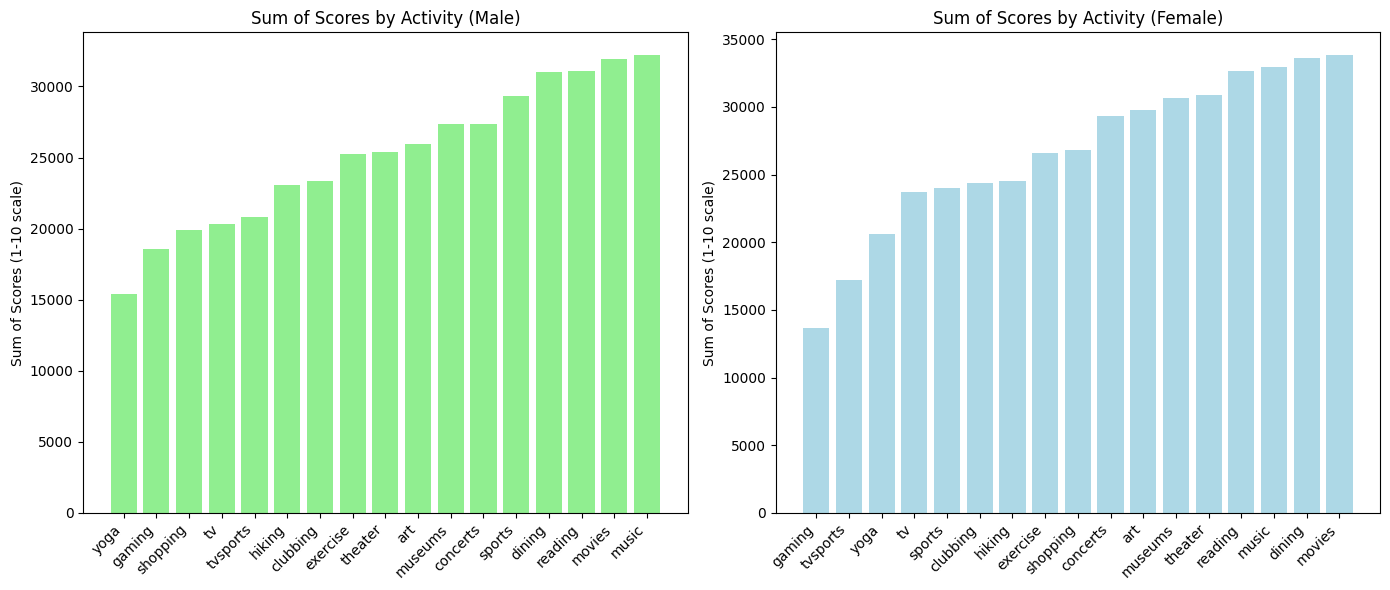

In [116]:
# Sélectionner les colonnes pertinentes
columns_of_interest = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Filtrer les données par genre (0 = female, 1 = male)
df_male = df[df['gender'] == 1]
df_female = df[df['gender'] == 0]

# Calculer la somme des colonnes pour chaque genre et trier
male_sums = df_male[columns_of_interest].sum().sort_values()
female_sums = df_female[columns_of_interest].sum().sort_values()

# Créer un graphique à barres pour les hommes et les femmes côte à côte
plt.figure(figsize=(14, 6))

# Graphique pour les hommes (male=1)
plt.subplot(1, 2, 1)
plt.bar(male_sums.index, male_sums.values, color='lightgreen')
plt.title('Sum of Scores by Activity (Male)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sum of Scores (1-10 scale)')

# Graphique pour les femmes (female=0)
plt.subplot(1, 2, 2)
plt.bar(female_sums.index, female_sums.values, color='lightblue')
plt.title('Sum of Scores by Activity (Female)')
plt.xticks(rotation=45, ha='right')
plt.ylabel('Sum of Scores (1-10 scale)')

# Ajuster l'espacement entre les graphiques
plt.tight_layout()

In [131]:
import plotly.express as px

# Sélectionner les colonnes d'activités et les regrouper par genre pour obtenir la moyenne
columns_of_interest = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 'gaming', 'clubbing',
                       'reading', 'tv', 'theater', 'movies', 'concerts', 'music', 'shopping', 'yoga']

# Calculer la moyenne des réponses pour chaque genre
activity_by_gender = df.groupby('gender')[columns_of_interest].mean().reset_index()

# Transformer les données pour les adapter au scatter plot (melt)
activity_melted = pd.melt(activity_by_gender, id_vars='gender', var_name='Activity', value_name='Average Score')

# Créer le scatter plot interactif
fig = px.scatter(activity_melted, x='Activity', y='Average Score', color='gender',
                 title='Activity Preferences by Gender (Scatter Plot)',
                 labels={'gender': 'Gender', 'Average Score': 'Average Score (1-10 scale)'},
                 hover_name='Activity', 
                 size='Average Score', 
                 template='plotly_dark')

# Afficher le graphique interactif
fig.show()

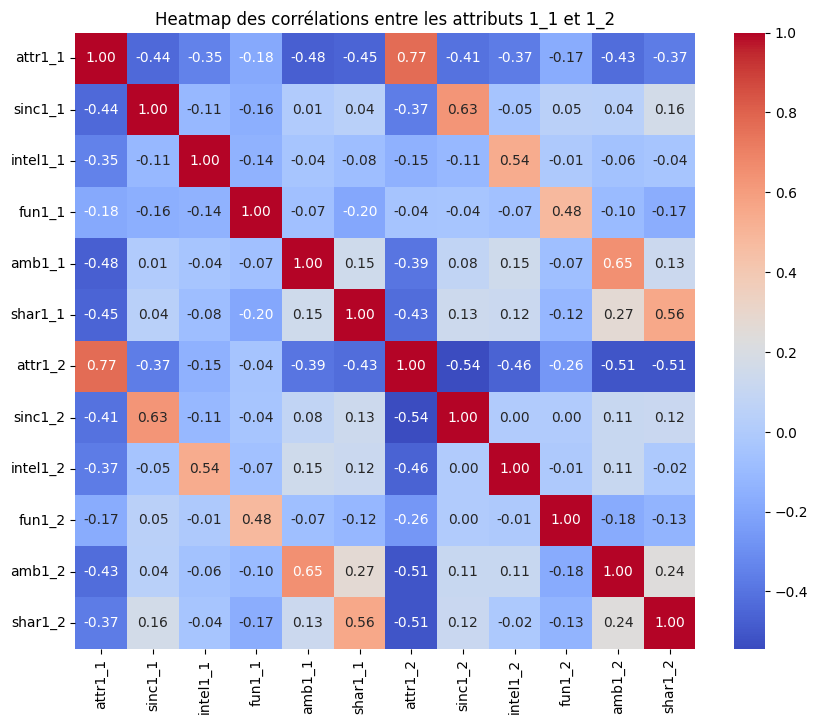

In [136]:
# 8. Analyse des corrélations

# Sélectionner uniquement les colonnes à corréler
columns_of_interest = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1',
                       'attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']

# Extraire ces colonnes du DataFrame
df_subset = df[columns_of_interest]

# Calculer la matrice de corrélation pour ces colonnes
corr_matrix = df_subset.corr()

# Afficher une heatmap pour la matrice de corrélation
plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Heatmap des corrélations entre les attributs 1_1 et 1_2')
plt.show()


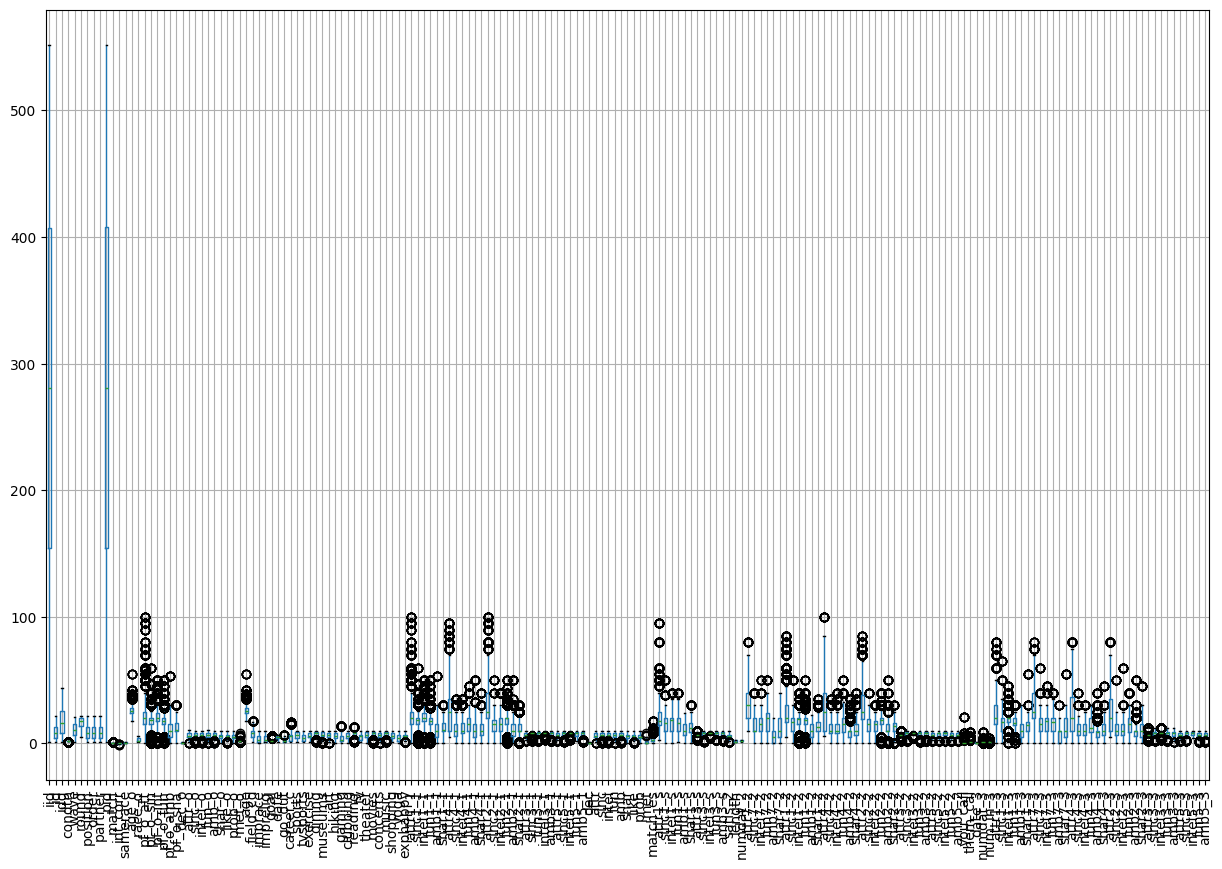

In [133]:
# 9. Détection des valeurs aberrantes
# Créer un boxplot pour chaque colonne numérique
df.boxplot(figsize=(15, 10))
plt.xticks(rotation=90)
plt.show()

In [138]:
# 10 QUESTIONS: correlations entre match et samerace
# Calculer la corrélation entre les colonnes 'match' et 'samerace'
correlation = df[['match', 'samerace']].corr()

# Afficher la corrélation
print(correlation)

             match  samerace
match     1.000000  0.013028
samerace  0.013028  1.000000


In [139]:
#colonne match
# Compter les occurrences de 1 et 0 dans la colonne 'match'
match_counts = df['match'].value_counts()

# Afficher le résultat
print(match_counts)

match
0    6998
1    1380
Name: count, dtype: int64


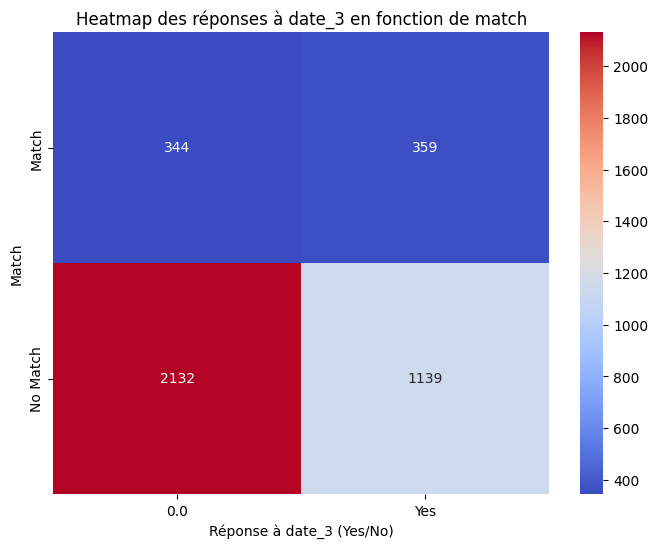

In [143]:
# EST CE QUE LE MACTH a donné lieu à un date par la suite?
# Créer une table croisée (crosstab) pour la heatmap
cross_tab_heatmap = pd.crosstab(df_filtered['match'], df_filtered['date_3'])

# Afficher la heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(cross_tab_heatmap, annot=True, cmap='coolwarm', fmt='d')
plt.title('Heatmap des réponses à date_3 en fonction de match')
plt.xlabel('Réponse à date_3 (Yes/No)')
plt.ylabel('Match')

# Afficher le graphique
plt.show()

#sur 1380 match seuls 359 ont donné à un rdv mais que 700 personnes ont répondu

In [144]:
# EST CE QUE LES ATTRIBUTS QUI COMPTENT AVEC SPEEDDATING SONT LES MEMES A LA FIN DU SPEEDATING
# FILTRE SUR un match par genre
# Filtrer les données où 'match' est égal à 1
df_match = df[df['match'] == 1]

# Sélectionner les colonnes de groupe 1 et groupe 2
group1_cols = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
group2_cols = ['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']

# Calculer les sommes pour chaque groupe de colonnes, séparé par genre
sum_group1_by_gender = df_match.groupby('gender')[group1_cols].sum()
sum_group2_by_gender = df_match.groupby('gender')[group2_cols].sum()

# Afficher les résultats
print("Somme des colonnes groupe 1 par genre :")
print(sum_group1_by_gender)

print("\nSomme des colonnes groupe 2 par genre :")
print(sum_group2_by_gender)

Somme des colonnes groupe 1 par genre :
         attr1_1   sinc1_1  intel1_1    fun1_1   amb1_1  shar1_1
gender                                                          
female  12080.71  12452.10  14482.65  12161.96  8741.67  8131.14
male    19230.67  10593.23  13473.87  12410.71  5703.10  7036.78

Somme des colonnes groupe 2 par genre :
         attr1_2   sinc1_2  intel1_2    fun1_2   amb1_2  shar1_2
gender                                                          
female  13424.81  10370.01  11861.43  11334.69  6960.72  8418.72
male    18924.70   9025.38  10689.97  11691.66  5142.03  7132.44


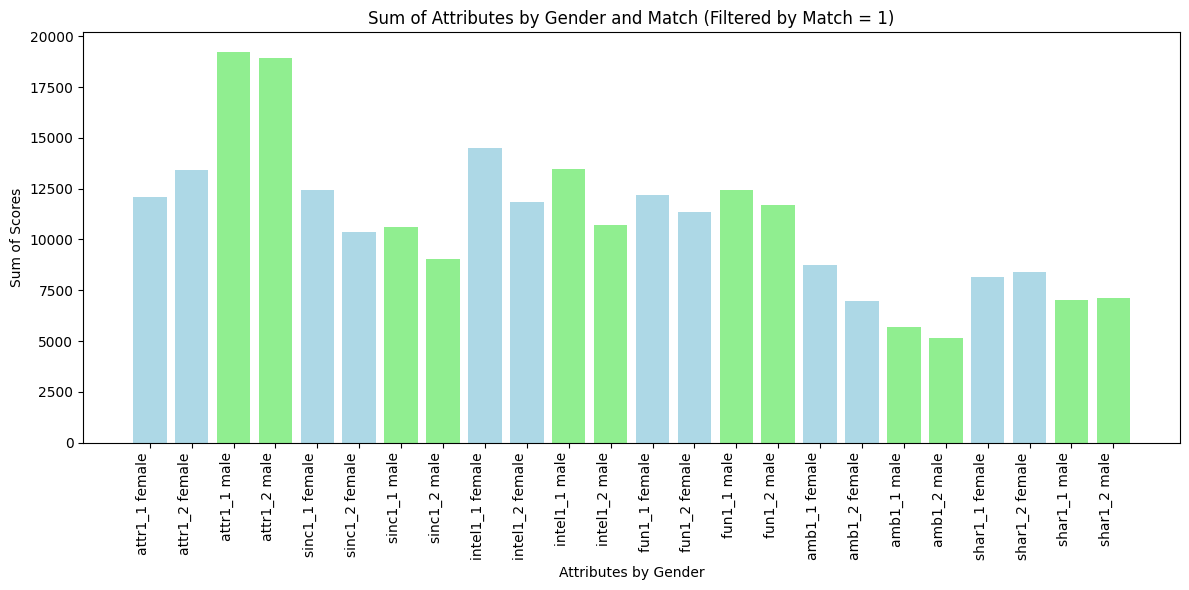

In [147]:
# Filtrer les données où 'match' est égal à 1
df_match = df[df['match'] == 1]

# Colonnes groupe 1 et groupe 2
group1_cols = ['attr1_1', 'sinc1_1', 'intel1_1', 'fun1_1', 'amb1_1', 'shar1_1']
group2_cols = ['attr1_2', 'sinc1_2', 'intel1_2', 'fun1_2', 'amb1_2', 'shar1_2']

# Calculer les sommes pour chaque groupe par genre (si genre est encodé comme 'female'/'male')
sum_group1_by_gender = df_match.groupby('gender')[group1_cols].sum()
sum_group2_by_gender = df_match.groupby('gender')[group2_cols].sum()

# Réorganiser les données pour les barres
categories = []
values = []

# Ajouter les colonnes en ordre : 1_1 female, 1_2 female, 1_1 male, 1_2 male pour chaque attribut
for col1, col2 in zip(group1_cols, group2_cols):
    # Female values
    categories.append(f"{col1} female")
    values.append(sum_group1_by_gender.loc['female', col1])
    
    categories.append(f"{col2} female")
    values.append(sum_group2_by_gender.loc['female', col2])
    
    # Male values
    categories.append(f"{col1} male")
    values.append(sum_group1_by_gender.loc['male', col1])
    
    categories.append(f"{col2} male")
    values.append(sum_group2_by_gender.loc['male', col2])

# Créer le plot
plt.figure(figsize=(12, 6))
plt.bar(categories, values, color=['lightblue', 'lightblue', 'lightgreen', 'lightgreen'] * (len(group1_cols)))
plt.xticks(rotation=90, ha='right')
plt.xlabel('Attributes by Gender')
plt.ylabel('Sum of Scores')
plt.title('Sum of Attributes by Gender and Match (Filtered by Match = 1)')
plt.tight_layout()

# Afficher le graphique
plt.show()

# a priori il faut se concentrer sur les interets

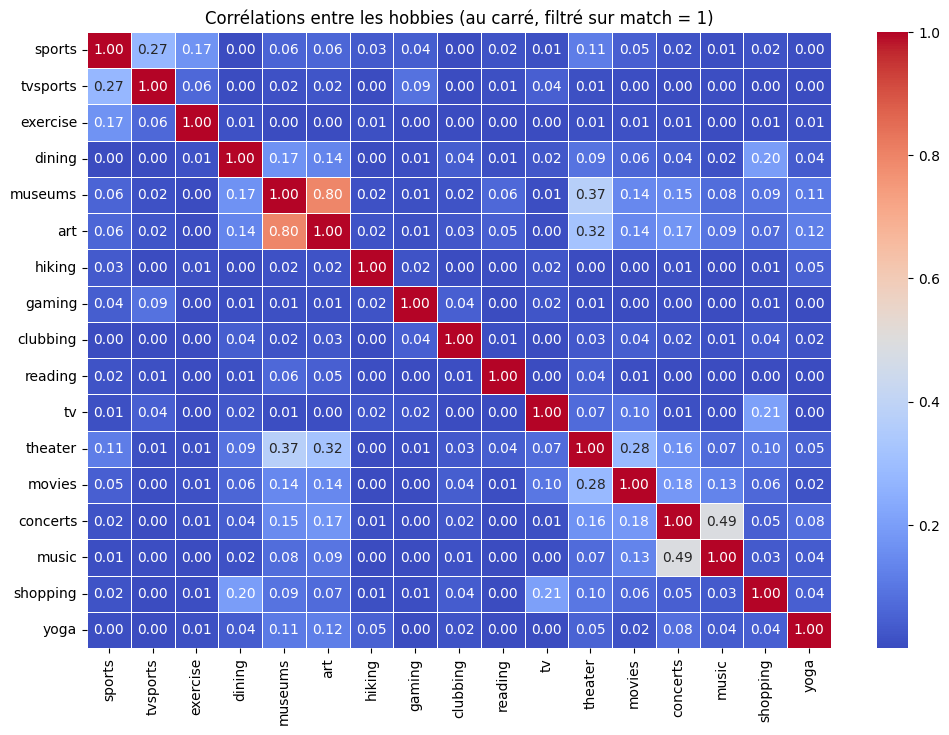

In [149]:
#corrélation interets filtre sur match = 1
# Filtrer les données où 'match' est égal à 1
df_match = df[df['match'] == 1]

# Colonnes des hobbies
hobbies_cols = ['sports', 'tvsports', 'exercise', 'dining', 'museums', 'art', 'hiking', 
                'gaming', 'clubbing', 'reading', 'tv', 'theater', 'movies', 'concerts', 
                'music', 'shopping', 'yoga']

# Extraire les colonnes des hobbies du DataFrame filtré
df_hobbies = df_match[hobbies_cols]

# Calculer la matrice de corrélation
corr_matrix = df_hobbies.corr()

# Élever au carré la matrice de corrélation pour enlever les valeurs négatives
corr_matrix_squared = corr_matrix ** 2

# Visualiser la matrice de corrélation au carré avec une heatmap
plt.figure(figsize=(12, 8))
sns.heatmap(corr_matrix_squared, annot=True, cmap='coolwarm', fmt='.2f', linewidths=0.5)
plt.title('Corrélations entre les hobbies (au carré, filtré sur match = 1)')
plt.show()